In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Read images

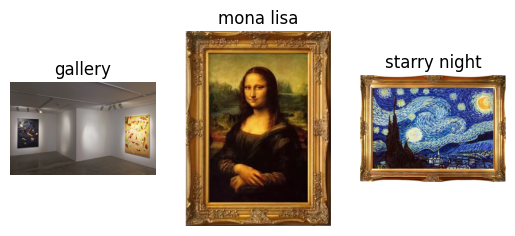

In [2]:
gallery = cv.imread('../images/gallery.png')
mona_lisa = cv.imread('../images/mona_lisa.jpg')
starry_night = cv.imread('../images/starry_night.jpg')
# Display the result
plt.subplot(131),plt.axis('off'), plt.imshow(cv.cvtColor(gallery, cv.COLOR_BGR2RGB)), plt.title('gallery')
plt.subplot(132),plt.axis('off'), plt.imshow(cv.cvtColor(mona_lisa, cv.COLOR_BGR2RGB)), plt.title('mona lisa')
plt.subplot(133),plt.axis('off'), plt.imshow(cv.cvtColor(starry_night, cv.COLOR_BGR2RGB)), plt.title('starry night')
plt.show()

flat images to perspective image

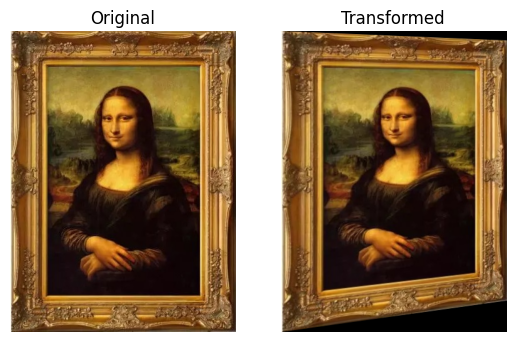

In [3]:
flat_image = mona_lisa
# Define the coordinates of the four corners of the flat image
flat_corners = np.array([[0, 0], [flat_image.shape[1] - 1, 0], [0, flat_image.shape[0] - 1], [flat_image.shape[1] - 1, flat_image.shape[0] - 1]], dtype='float32')
# Define the vertical perspective transformation
vertical_perspective_corners = np.array([[0, 0], [flat_image.shape[1] - 1, 15], [0, flat_image.shape[0] - 1], [flat_image.shape[1] - 1, flat_image.shape[0] - 51]], dtype='float32')
# Compute the vertical perspective transformation matrix
vertical_matrix = cv.getPerspectiveTransform(flat_corners, vertical_perspective_corners)
# Apply the vertical perspective transformation
vertical_perspective_image = cv.warpPerspective(flat_image, vertical_matrix, (flat_image.shape[1], flat_image.shape[0]))
plt.subplot(121),plt.axis('off'), plt.imshow(cv.cvtColor(flat_image, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(vertical_perspective_image, cv.COLOR_BGR2RGB)), plt.title('Transformed')
plt.axis('off')
plt.show()

Put perspective image into gallery

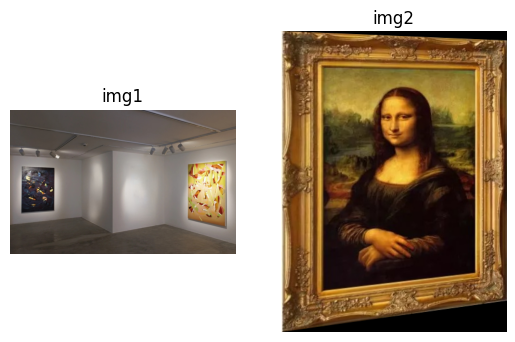

In [4]:
img1 = gallery.copy()
img2 = vertical_perspective_image.copy()
plt.subplot(121),plt.axis('off'), plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), plt.title('img1')
plt.subplot(122),plt.axis('off'), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)), plt.title('img2')
plt.show()

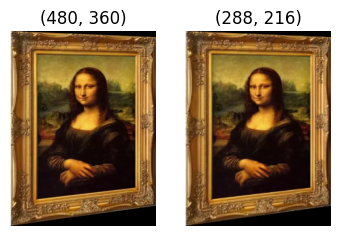

In [5]:
scale_factor = 0.6
original_height, original_width = img2.shape[:2]
new_height = int(original_height * scale_factor)
new_width = int(original_width * scale_factor)
img2 = cv.resize(img2, (new_width, new_height))
plt.subplot(131),plt.axis('off'), plt.imshow(cv.cvtColor(vertical_perspective_image, cv.COLOR_BGR2RGB)), plt.title(str(vertical_perspective_image.shape[:2]))
plt.subplot(132),plt.axis('off'), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)), plt.title(str(img2.shape[:2]))
plt.show()

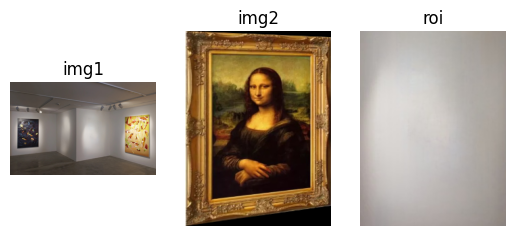

In [6]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
y_start = 350
x_start = 650
roi = img1[y_start:y_start+rows, x_start:x_start+cols ]
# Display the result
plt.subplot(131),plt.axis('off'), plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), plt.title('img1')
plt.subplot(132),plt.axis('off'), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)), plt.title('img2')
plt.subplot(133),plt.axis('off'), plt.imshow(cv.cvtColor(roi, cv.COLOR_BGR2RGB)), plt.title('roi')
plt.show()

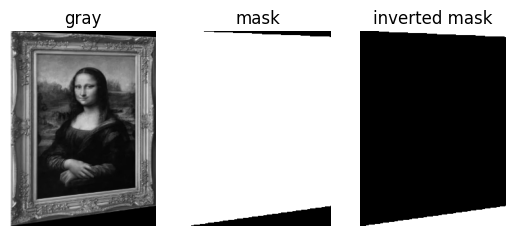

In [7]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 1, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# Display the result
plt.subplot(131),plt.axis('off'), plt.imshow(cv.cvtColor(img2gray, cv.COLOR_BGR2RGB)), plt.title('gray')
plt.subplot(132),plt.axis('off'), plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB)), plt.title('mask')
plt.subplot(133),plt.axis('off'), plt.imshow(cv.cvtColor(mask_inv, cv.COLOR_BGR2RGB)), plt.title('inverted mask')
plt.show()

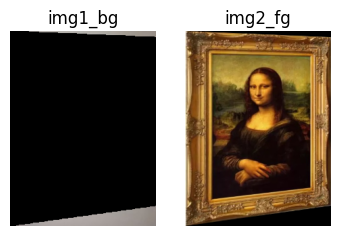

In [8]:
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Display the result
plt.subplot(131),plt.axis('off'), plt.imshow(cv.cvtColor(img1_bg, cv.COLOR_BGR2RGB)), plt.title('img1_bg')
plt.subplot(132),plt.axis('off'), plt.imshow(cv.cvtColor(img2_fg, cv.COLOR_BGR2RGB)), plt.title('img2_fg')
plt.show()

In [1]:
dst = cv.add(img1_bg,img2_fg)
plt.subplot(121), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)), plt.title('Transformed')
plt.axis('off')
plt.show()

NameError: name 'cv' is not defined

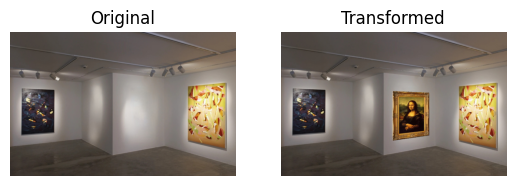

In [9]:
# Put logo in ROI and modify the main image
img1[y_start:y_start+rows, x_start:x_start+cols ] = dst
# Display the result
plt.subplot(121),plt.axis('off'), plt.imshow(cv.cvtColor(gallery, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), plt.title('Transformed')
plt.axis('off')
plt.show()